In [4]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os, glob
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 15})
from netCDF4 import Dataset


In [5]:
input_dir = "/run/media/ludo/DATA/google-drive/Thèse/EUREC4a/github/Input/Satellites/SSTs/*"

In [6]:
def calculate_mean_SST(input_dir):
    
    my_list = []
    
    for file in glob.glob(input_dir):
        data = xr.open_dataset(file)
        my_list.append(data)
    
    SSTs = xr.concat(my_list, dim="time")
    mean_SST = SSTs.mean(dim=["time"], skipna=True)
    mean_SST.to_netcdf("../output/SST_mean.nc")
    
    return mean_SST

In [26]:
def calculate_std_SST(input_dir):
    
    my_list = []
    
    for file in glob.glob(input_dir):
        data = xr.open_dataset(file)
        my_list.append(data)
    
    SSTs = xr.concat(my_list, dim="time")
    std_SST = SSTs.std(dim=["time"], skipna=True)
    std_SST.to_netcdf("../output/SST_std.nc")
    
    return std_SST

In [34]:
def plot_SST(mean_SST):
    
    plt.rcParams.update({'font.size': 15})

     
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
   
    #fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    
    lat = mean_SST["lat"]
    lon = mean_SST["lon"]
    SST = mean_SST["SST"]
    
    my_plot = plt.pcolormesh(lon, lat, SST)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.grid(color='w', linestyle='-', linewidth=1, alpha=0.5)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    ax.set_aspect('equal')
    
    cb = fig.colorbar(my_plot)
    
    cb.ax.set_ylabel('SSTs (°C)')
    
  #  ax.set_xlim([])
  #  ax.set_ylim([])
    
                           
    fig.savefig("../Figures/SST_std.jpeg")

In [13]:
mean = calculate_mean_SST(input_dir)
#plot_SST(mean)

KeyboardInterrupt: 

In [28]:
std = calculate_std_SST(input_dir)

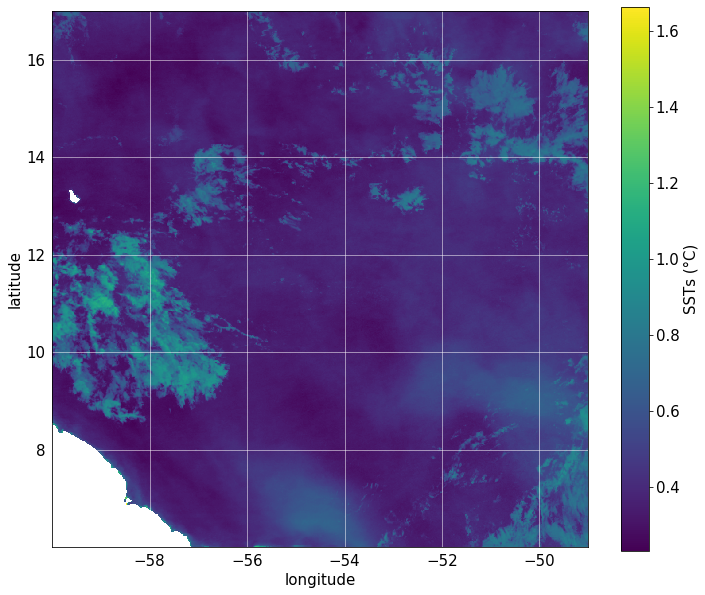

In [35]:
plot_SST(std)